### Algorithme des $k$-moyennes

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


On donne la fonction suivante :

In [25]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2)) #on tire 2n variable aléat  tirées à la gaussienne en n lignes 2 colonnes 
    X = X*np.array([sx,sy]) # on multiple col[0] avex sx et col[1] avex sy
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]]) #matrice de rotation
    X = X@r # rotation de X par la multiplication matricielle
    X = X+np.array([mx,my]) #Translation de X ==> moy(X)=mx, moy(Y)=my
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

(-5.0, 5.0)

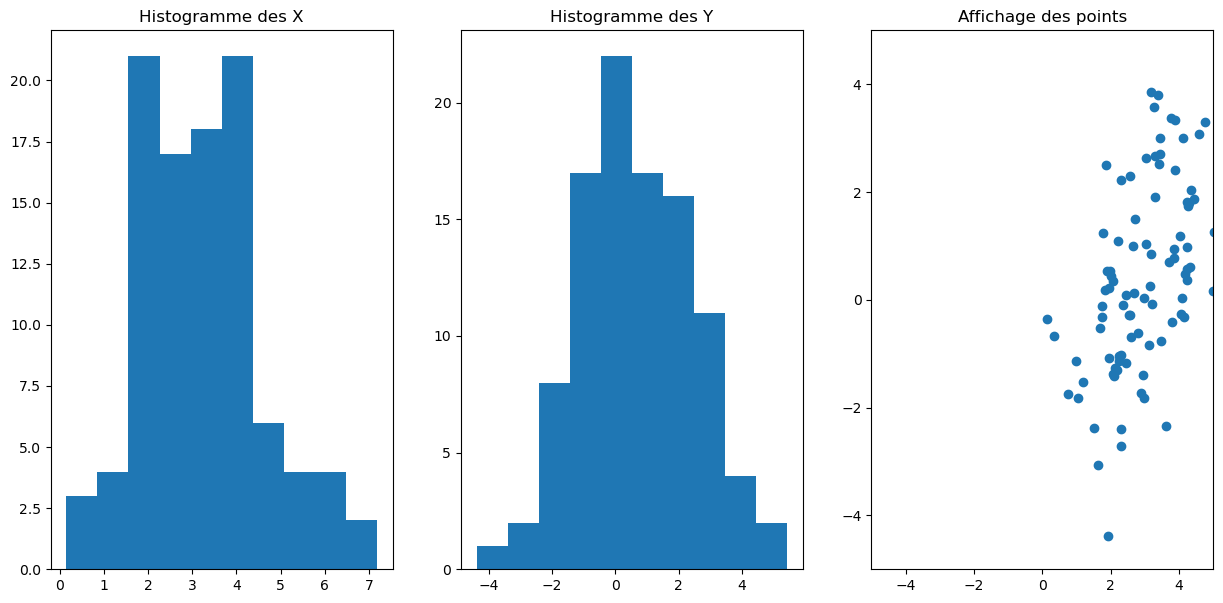

In [26]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
point=generate(100,3,1,0.5,2,np.pi/6)
plt.figure(figsize=(15,7))

plt.subplot(131)
plt.title("Histogramme des X")
plt.hist(point[:,0])

plt.subplot(132)
plt.title("Histogramme des Y")
plt.hist(point[:,1])

plt.subplot(133)
plt.title("Affichage des points")
plt.scatter(x=point[:,0],y=point[:,1],)
plt.xlim([-5,5])
plt.ylim([-5,5])

Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [27]:
X1 = generate(30,0,1,3,0,np.pi/3)#bleu
X2 = generate(30,-2,1,2,2,-np.pi/4)#orange 
X3 = generate(30,7,2,-4,0.3,np.pi/4)#vert

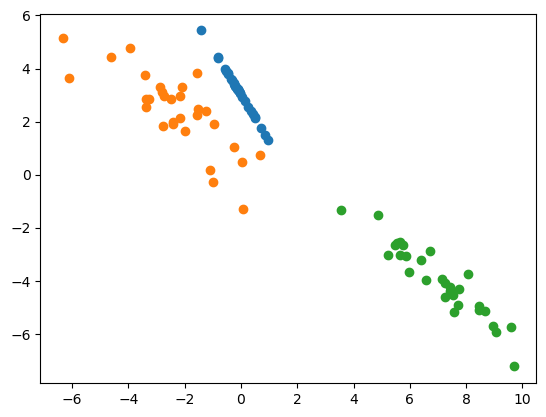

In [28]:
plt.figure()
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

           X         Y
0  -3.364332  2.841472
1   0.486542  2.157284
2   0.041359  0.494774
3   0.353461  2.387788
4   5.224258 -3.008640
..       ...       ...
85  0.421639  2.269700
86 -0.960596  1.905438
87  7.249737 -4.069618
88 -2.875820  3.308074
89  0.084988 -1.272953

[90 rows x 2 columns]


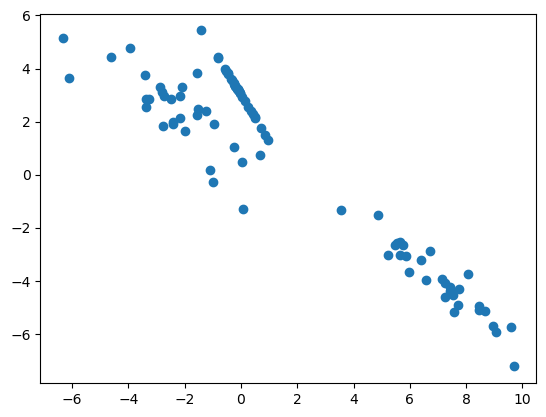

In [29]:

X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)
plt.scatter(x=X[:,0],y=X[:,1])
df=pd.DataFrame(data={'X':X[:,0],'Y':X[:,1]})
print(df)

Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [30]:
df['cluster']=np.random.randint(0,3,len(df))
print(df)

           X         Y  cluster
0  -3.364332  2.841472        0
1   0.486542  2.157284        2
2   0.041359  0.494774        2
3   0.353461  2.387788        0
4   5.224258 -3.008640        1
..       ...       ...      ...
85  0.421639  2.269700        2
86 -0.960596  1.905438        2
87  7.249737 -4.069618        2
88 -2.875820  3.308074        1
89  0.084988 -1.272953        2

[90 rows x 3 columns]


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [31]:
m=df.groupby('cluster').mean() 
print(m)
means={i:(m.loc[i,'X'],m.loc[i,'Y']) for i in m.index}
means


                X         Y
cluster                    
0        0.942707  1.355045
1        1.684615  0.283506
2        2.016685 -0.109368


{0: (0.9427073075761138, 1.3550449264044515),
 1: (1.6846152226078472, 0.2835064036049392),
 2: (2.0166851384192506, -0.10936783931318182)}

Implantez une fonction calculant la distance euclidienne entre deux points

In [54]:
def distance1(p1,p2):
    return np.sqrt(np.sum((p2-p1)**2))

#test
p1=np.array([0,0,4])
p2=np.array([5,2,5])
print(distance1(p1,p2))

5.477225575051661


In [33]:
def distance(p1,p2):
    x=(p1[0]-p2[0])**2
    y=(p1[1]-p2[1])**2
    dist=np.sqrt(x+y)
    return dist

#test
p1=np.array([0,0])
p2=np.array([5,2])
print(distance(p1,p2))

5.385164807134504


Implantez une fonction qui pour un point donné, retourn la clé associée à la moyenne la plus proche

In [34]:
def nearest_k(p,mean):
    L={i:distance1(p,mean[i]) for i in mean.keys()}
    dist_min=min(L,key=L.get)
    return dist_min
#test
nearest_k(np.array([-0.5,0.45]),means)

0

Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [35]:
def new_cluster(row,means):
    return nearest_k(np.array(row[['X','Y']]),means)

In [36]:
df['new_cluster']=df.apply(new_cluster,args=(means,),axis=1)
df

,X,Y,cluster,new_cluster
0,-3.364332,2.841472,0,0
1,0.486542,2.157284,2,0
2,0.041359,0.494774,2,0
3,0.353461,2.387788,0,0
4,5.224258,-3.008640,1,2
...,...,...,...,...
85,0.421639,2.269700,2,0
86,-0.960596,1.905438,2,0
87,7.249737,-4.069618,2,2
88,-2.875820,3.308074,1,0


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

In [37]:
colors={0:'yellow',1:'red',2:'blue', 3:'crimson', 4:'orange',5:'gray',6:'purple',7:'green'}

In [38]:
def algo_K_moyenne(df,k):
    df['cluster']=np.random.randint(0,k,len(df)) # tirage aléatoires des valeurs de cluster
    m=df.groupby('cluster').mean() # calcul des moyennes pour chaque cluster
    means={i:(m.loc[i,'X'],m.loc[i,'Y']) for i in m.index}# création de la dictionnaire de means 
    df['new_cluster']=df.apply(new_cluster,args=(means,),axis=1)
    plt.figure()
    df.plot(x='X',y='Y', kind='scatter',color=df['cluster'].map(colors))#affichage du tirage aléatoire
    while (df['new_cluster']!=df['cluster']).any():
        df['cluster']=df['new_cluster'] #affectation de new_cluster à cluster si une colonne de new_cluster != de celle de cluster 
        m=df.groupby('cluster').mean() #recalcule les moyennes 
        means={i:(m.loc[i,'X'],m.loc[i,'Y']) for i in m.index} #recréation de la dictionnaire de means 
        df['new_cluster']=df.apply(new_cluster,args=(means,),axis=1)#application de la fonction new_cluster pour calculer les nouvelles valeurs de new_cluster
        plt.figure()
        df.plot(x='X',y='Y', kind='scatter',color=df['cluster'].map(colors))



<Figure size 640x480 with 0 Axes>

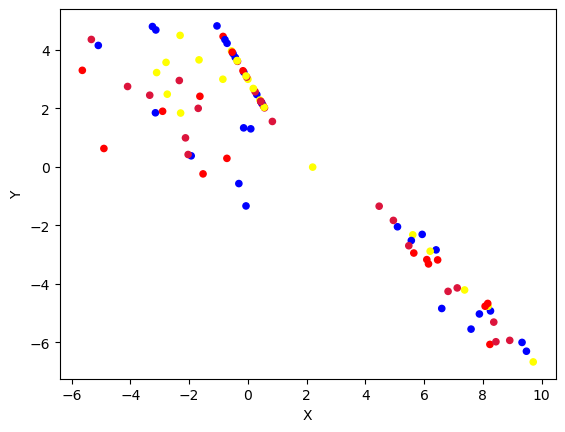

<Figure size 640x480 with 0 Axes>

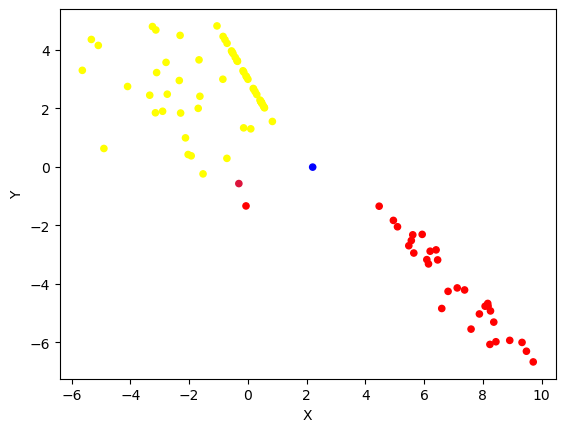

<Figure size 640x480 with 0 Axes>

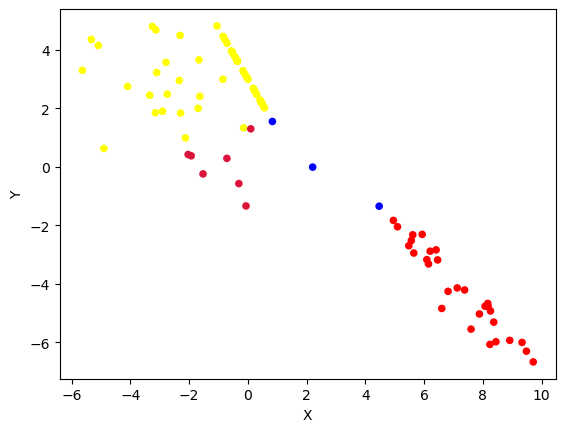

<Figure size 640x480 with 0 Axes>

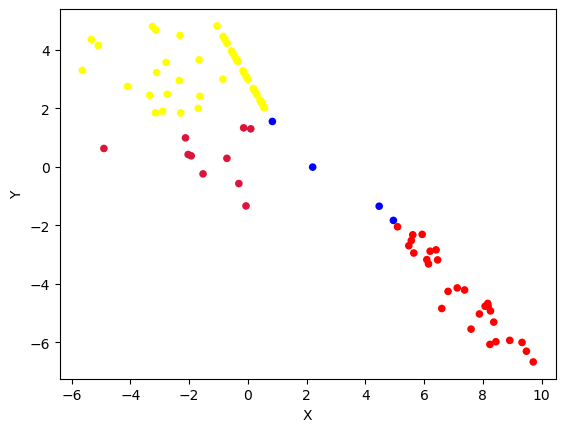

<Figure size 640x480 with 0 Axes>

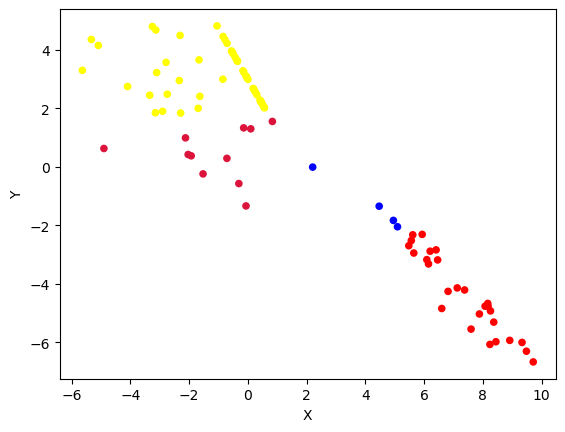

<Figure size 640x480 with 0 Axes>

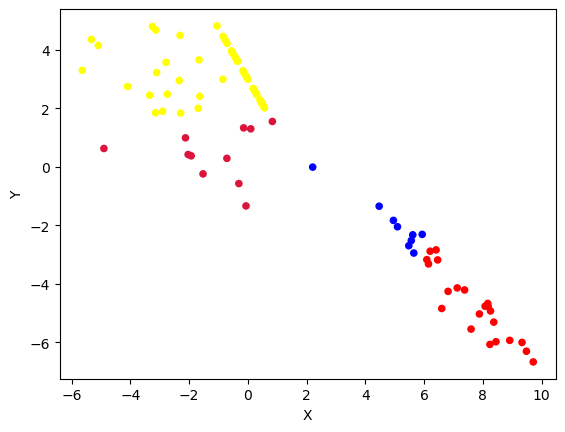

<Figure size 640x480 with 0 Axes>

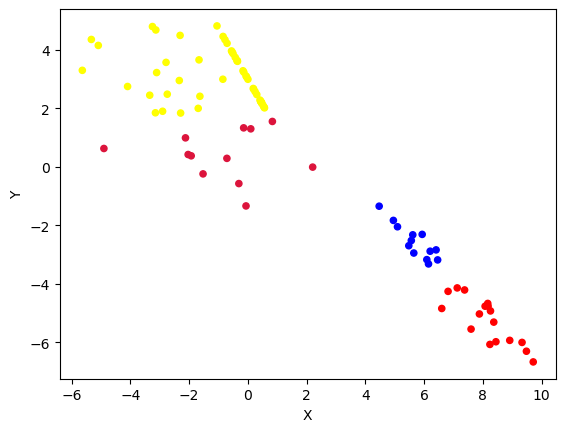

In [39]:
#test
X1 = generate(30,0,1,3,0,np.pi/3)#bleu
X2 = generate(30,-2,1,2,2,-np.pi/4)#orange 
X3 = generate(30,7,2,-4,0.3,np.pi/4)#vert
X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)
df=pd.DataFrame(data={'X':X[:,0],'Y':X[:,1]})
algo_K_moyenne(df,4)

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

<Figure size 640x480 with 0 Axes>

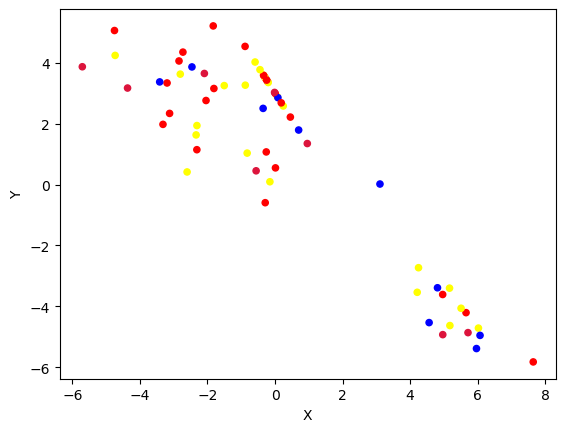

<Figure size 640x480 with 0 Axes>

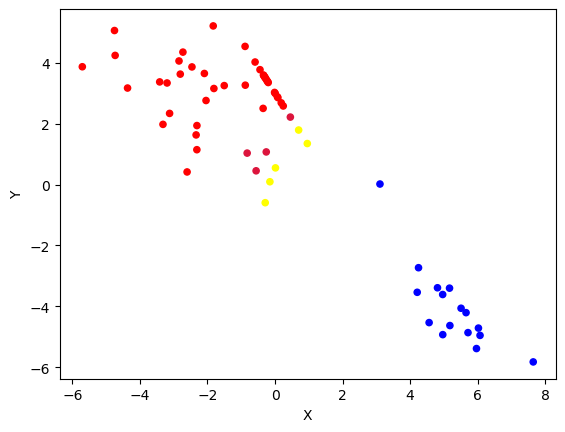

<Figure size 640x480 with 0 Axes>

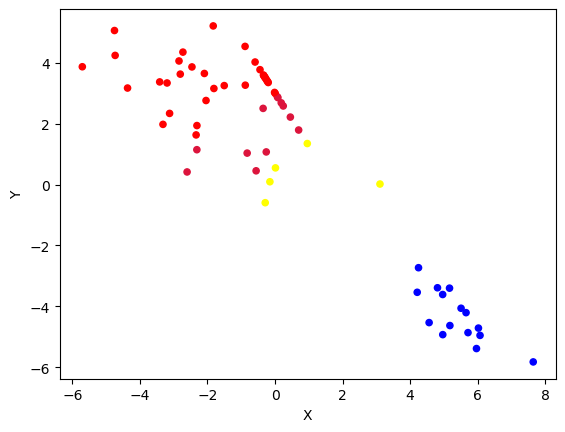

<Figure size 640x480 with 0 Axes>

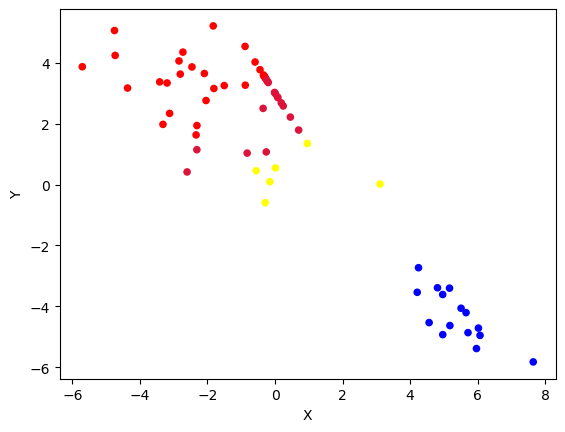

<Figure size 640x480 with 0 Axes>

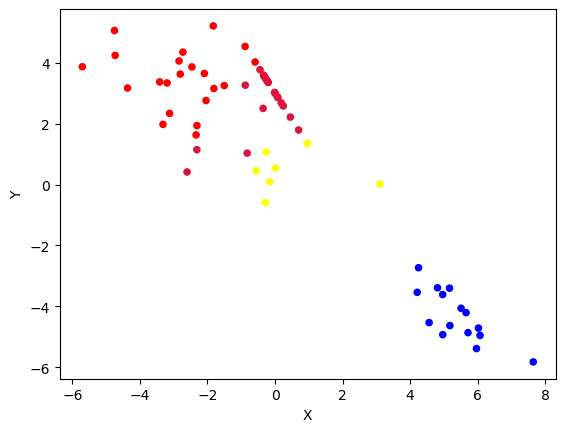

<Figure size 640x480 with 0 Axes>

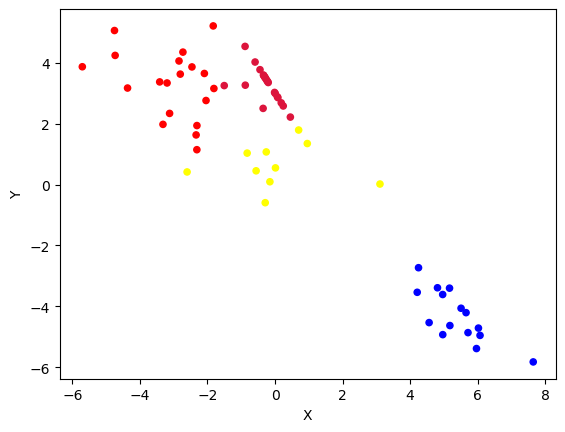

In [40]:
X1 = generate(20,0,1,3,0,np.pi/3)#bleu
X2 = generate(30,-2,1,2,2,-np.pi/4)#orange 
X3 = generate(15,5,2,-4,0.3,np.pi/4)#vert
X=np.concatenate([X1,X2,X3])
np.random.shuffle(X)
df=pd.DataFrame(data={'X':X[:,0],'Y':X[:,1]})
algo_K_moyenne(df,4)

Définissez une fonction qui calcule la somme des distances intra-clusters.

In [41]:
df

,X,Y,cluster,new_cluster
0,6.018453,-4.712308,2,2
1,0.242069,2.580724,3,3
2,-2.043323,2.760365,1,1
3,0.066850,2.884213,3,3
4,0.697852,1.791285,0,0
...,...,...,...,...
60,-0.445977,3.772455,3,3
61,-4.752374,5.058473,1,1
62,-2.092180,3.648276,1,1
63,-0.248161,3.429827,3,3


In [50]:
df1=df[df['cluster']==0]
df1

,X,Y,cluster,new_cluster
4,0.697852,1.791285,0,0
13,-0.291535,-0.595027,0,0
14,-0.825823,1.033707,0,0
17,-0.561135,0.451906,0,0
23,0.953981,1.347657,0,0
25,3.104339,0.018091,0,0
28,-2.603624,0.414575,0,0
34,-0.152984,0.092690,0,0
38,-0.261008,1.071951,0,0
47,0.011806,0.548201,0,0


In [55]:
def somme_dist_intra_cluster(df):
    distt={}
    for k in df['cluster'].unique():
        df1=df[df['cluster']==k]
        distt[k]=sum([distance1(np.array(df1.iloc[i]['X'],df1.iloc[i]['Y']),np.array(df1.iloc[j]['X'],df1.iloc[j]['Y'])) for i in range(len(df1)) for j in range(i+1,len(df1))])
    return distt

#test

print(somme_dist_intra_cluster(df))

{2: 101.67499742336103, 3: 99.59514894308268, 1: 208.8650258457888, 0: 71.14327504637124}
